# Harting's dip test to test bimodal distribution of cortical profile
This test is run on results from the decoding analysis with independent vertex selection of single layers (v2.0).

In [11]:
from pathlib import Path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import diptest
import matplotlib.pyplot as plt
from src.config import SUBJECTS, SESSION, N_LAYER
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))

DIR_DATA = "/data/pt_01880/Experiment1_ODC/paper/v2.0/decoding"
FILTER_SIZE = "none" # none or filter size

# set
SESS = "VASO" # GE_EPI, SE_EPI, VASO, VASO_uncorrected
AREA = "v1"

In [12]:
def get_profile(sess, day):
    y = np.zeros((N_LAYER, len(SUBJECTS)))
    for i, subj in enumerate(SUBJECTS):
        path = Path(DIR_DATA) / subj / f"{sess}{SESSION[subj][sess][day]}"
        file = path / f"{AREA}_bandpass_{FILTER_SIZE}" / "accuracy.csv"
        data = np.genfromtxt(file, delimiter=',')
        for j in range(N_LAYER):
            y[j, i] = np.mean(data[j, :] * 100)
    return y

In [13]:
y1 = get_profile(SESS, 0)
y2 = get_profile(SESS, 1)
y3 = np.append(y1, y2, axis=1)

# test original sample
dip, p_value = diptest.diptest(np.mean(y3, axis=1))

# test bootstrapped samples
dip_boot = []
p_boot = []
n_bootstrap = 1000
n_profiles = np.shape(y3)[1]
for _ in range(n_bootstrap):
    val = np.random.choice(np.arange(n_profiles), n_profiles, replace=True)
    arr = y3[:, val]
    arr = np.mean(arr, axis=1)
    dval, pval = diptest.diptest(arr)
    dip_boot.append(dval)
    p_boot.append(pval)

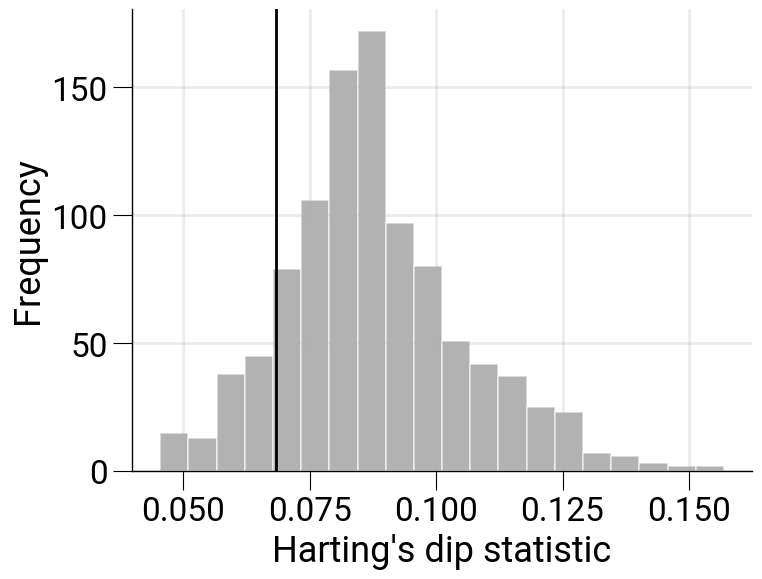

In [14]:
fig, ax = plt.subplots()
ax.hist(dip_boot, color="gray", alpha=0.6, bins=20, edgecolor="white", linewidth=1.2)
ax.set_xlabel("Harting's dip statistic")
ax.axvline(np.mean(dip), color="black")
ax.set_ylabel("Frequency")
file_out = f"/data/pt_01880/dip_statistic_{SESS}.svg"
fig.savefig(file_out, dpi=300, bbox_inches="tight", transparent=True, format="svg")

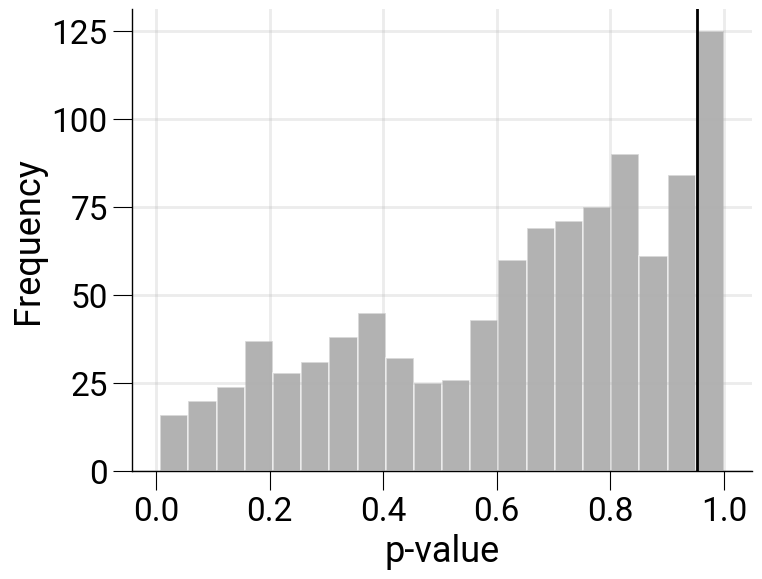

In [15]:
fig, ax = plt.subplots()
ax.hist(p_boot, color="gray", alpha=0.6, bins=20, edgecolor="white", linewidth=1.2)
ax.set_xlabel("p-value")
ax.axvline(np.mean(p_value), color="black")
ax.set_ylabel("Frequency")
file_out = f"/data/pt_01880/dip_p_value_{SESS}.svg"
fig.savefig(file_out, dpi=300, bbox_inches="tight", transparent=True, format="svg")